# Wine Quality Analysis

## 1. Data Exploration

### 1A. Distribution of Wine Quality Scores

We start by exploring the dataset to understand the distribution of quality scores for red and white wines.  
This will help us see if there are any noticeable differences between the two types of wine.

We will:
- Load the datasets
- Check basic statistics and distributions
- Compare the quality distributions between red and white wines
- Visualize the distributions using histograms and KDE plots

Red Wine Quality Distribution:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

White Wine Quality Distribution:
count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


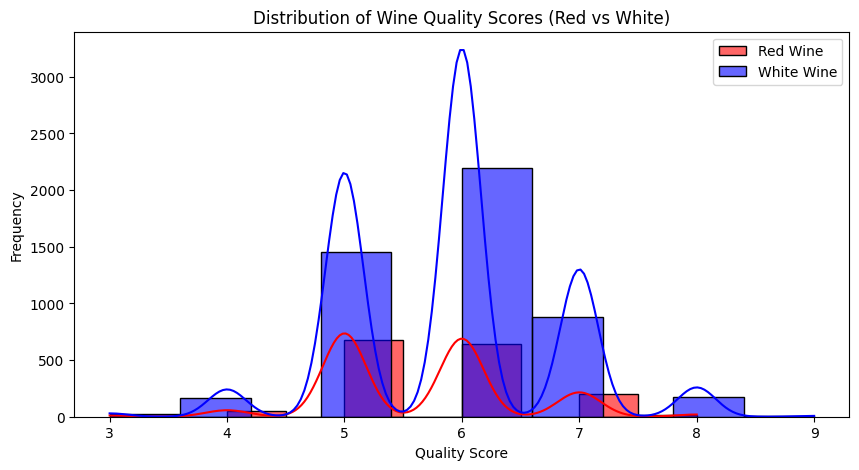

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Check basic statistics
print("Red Wine Quality Distribution:")
print(red_wine["quality"].describe())
print("\nWhite Wine Quality Distribution:")
print(white_wine["quality"].describe())

# Plot the distribution of wine quality
plt.figure(figsize=(10,5))
sns.histplot(red_wine["quality"], bins=10, kde=True, color="red", label="Red Wine", alpha=0.6)
sns.histplot(white_wine["quality"], bins=10, kde=True, color="blue", label="White Wine", alpha=0.6)

plt.title("Distribution of Wine Quality Scores (Red vs White)")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Red Wine Quality Distribution
The distribution of red wine quality is summarized as follows:
- **Count**: 1599 samples
- **Mean**: 5.64
- **Standard Deviation**: 0.81
- **Minimum Quality**: 3
- **25th Percentile (Q1)**: 5
- **Median (50th Percentile)**: 6
- **75th Percentile (Q3)**: 6
- **Maximum Quality**: 8

This distribution indicates that most red wines have a quality score around 5 and 6, with a few higher-quality wines reaching up to 8. The mean quality score for red wines is 5.64, suggesting that the overall quality is relatively low to moderate.

---

### White Wine Quality Distribution
The distribution of white wine quality is summarized as follows:
- **Count**: 4898 samples
- **Mean**: 5.88
- **Standard Deviation**: 0.89
- **Minimum Quality**: 3
- **25th Percentile (Q1)**: 5
- **Median (50th Percentile)**: 6
- **75th Percentile (Q3)**: 6
- **Maximum Quality**: 9

White wines have a mean quality score of 5.88, which is slightly higher than red wines. The distribution is very similar to red wines, with most of the quality scores around 5 to 6, though the maximum score can go up to 9. This suggests that white wines may have a slightly broader range of quality scores than red wines.

---

### Comparison of Red and White Wine Quality Distributions
- **Mean Quality**: White wines have a slightly higher mean quality score (5.88) compared to red wines (5.64).
- **Range**: Both types of wine have a similar range of quality scores, with red wines having a maximum of 8 and white wines reaching 9.
- **Skewness**: Both distributions are centered around a quality score of 6, indicating that most wines are rated in the middle of the quality scale, with a few outliers towards the higher end.

These observations suggest that while red and white wines share similarities in quality distribution, white wines may have a slightly higher average quality.